A blog post about [Kaggle Learn](https://www.kaggle.com/learn/overview), our new interactive machine learning and data science courses, is currently on the front page of Hacker News. You can read the review of Dan Becker's deep learning with TensorFlow and Keras course [here](https://techandmortals.wordpress.com/2018/01/27/kaggle-learn-review-there-is-a-deep-learning-track-and-it-is-worth-your-time/). 

This made me wonder--how many times has Kaggle been mentioned in Hacker News stories? Let's find out using the BigQuery Hacker News dataset! I'll use the BigQuery Python client library to query the `stories` table of the `hacker_news` dataset where `title` contains `kaggle` or `Kaggle`. 

Before I begin, note that in total size, the [Hacker News BigQuery dataset](https://www.kaggle.com/hacker-news/hacker-news) is 14GB which is larger than most Kaggle Datasets (the file upload limit is 10GB uncompressed). It's not big in BigQuery terms, but it's still a good idea for me to avoid using `SELECT *` statements so that I don't query more than necessary against my 5TB monthly free quota.

Anyway, let's get started!

In [6]:
from google.cloud import bigquery
import pandas as pd

client = bigquery.Client()

# Using WHERE reduces the amount of data scanned / quota used
query = """
SELECT title, time_ts
FROM `bigquery-public-data.hacker_news.stories`
WHERE REGEXP_CONTAINS(title, r"(k|K)aggle")
ORDER BY time
"""

query_job = client.query(query)

iterator = query_job.result(timeout=30)
rows = list(iterator)

# Transform the rows into a nice pandas dataframe
headlines = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# Look at the first 10 headlines
headlines.head(10)

,title,time_ts
0,Kaggle: Data mining competitions,2010-04-28 20:31:11+00:00
1,Ask kaggle founder questions.,2010-09-21 11:03:53+00:00
2,R package recommendaiton engine contest now li...,2010-10-10 13:41:35+00:00
3,"Data prediction competition site, Kaggle, gets...",2010-10-27 08:32:27+00:00
4,Kaggle - Improving data analysis algorithms by...,2011-01-05 22:33:23+00:00
5,Kaggle Social Network Challenge (Inferring Fri...,2011-01-17 09:38:10+00:00
6,Link Prediction by De-anonymization: Winning t...,2011-03-09 15:38:35+00:00
7,How Kaggle competitors use R,2011-04-19 19:32:24+00:00
8,Revolution Analytics Offers Free Software for ...,2011-04-20 09:08:46+00:00
9,Kaggle contest aims to boost Wikipedia editors,2011-07-05 20:13:38+00:00


Very cool! It was super quick and easy to pull down this data. It's fun to see some of the very first mentions of Kaggle way back in 2010 when Anthony's brainchild was just getting its start. Amazing how we've grown from only running supervised machine learning competitions to today being able to share reproducible analyses querying huge datasets in BigQuery for free using Kernels. Funnily enough, I see from [Wikipedia](https://en.wikipedia.org/wiki/BigQuery) that BigQuery was announced just a couple of weeks after the first mention of Kaggle in Hacker News on May 19th, 2010. :)

Alright, now that I have the headlines in a nice dataframe, I think the natural next step is to create a word cloud, don't you think? Let's go ahead and do that and see what stands out.

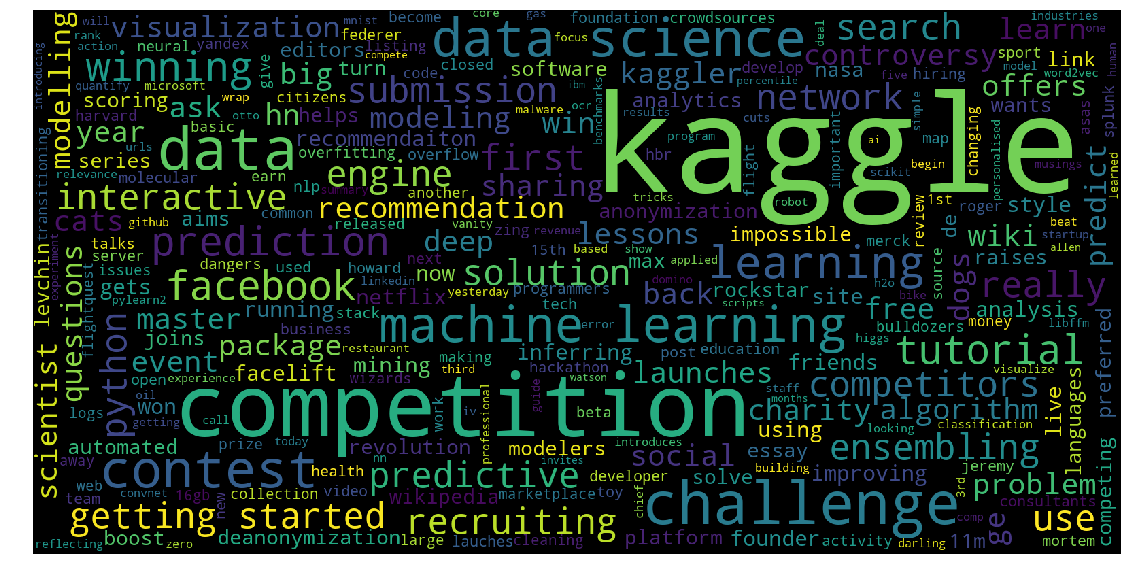

In [7]:
import wordcloud
import matplotlib.pyplot as plt

words = ' '.join(headlines.title).lower()
cloud = wordcloud.WordCloud(background_color='black',
                            max_font_size=200,
                            width=1600,
                            height=800,
                            max_words=300,
                            relative_scaling=.5).generate(words)
plt.figure(figsize=(20,10))
plt.axis('off')
plt.savefig('kaggle-hackernews.png')
plt.imshow(cloud);

Looks about right to me! Let me know what you think about using the BigQuery Python client libraries to query BigQuery datasets. If you want to try it out yourself, I recommend a few resources:

* Sohier's ["Getting Started" kernel](https://www.kaggle.com/sohier/how-to-integrate-bigquery-pandas) will show you the basics plus he shares [more about the BigQuery API here](https://www.kaggle.com/sohier/beyond-queries-exploring-the-bigquery-api).
* Check out these [tips for managing resources in BigQuery](https://cloud.google.com/bigquery/docs/best-practices) (so you don't exhaust your 5TB too quickly).
* See all BigQuery datasets that are accessible on Kaggle via Kernels here: https://www.kaggle.com/datasets?filetype=bigQuery

## Inspirations

* Recent studies have found that many forums tend to be dominated by a very small fraction of users. Is this true of Hacker News?
* Hacker News has received complaints that the site is biased towards Y Combinator startups. Do the data support this?
* Is the amount of coverage by Hacker News predictive of a startup’s success?